# Project: Walmart Sales - Supervised Machine Learning

## Part 1 : Exploratory data analysis and data preprocessings

In [74]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.plotlyjs = r'C:\Users\Public\plotly\package_data\plotly.min.js'
pio.renderers.default = "png" # Comment / delete this line for interactive graphs

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [61]:
data = pd.read_csv("./data/Walmart_Store_sales.csv", parse_dates = ["Date"], infer_datetime_format = True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092


### 1.1 Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         150 non-null    float64       
 1   Date          132 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  138 non-null    float64       
 4   Temperature   132 non-null    float64       
 5   Fuel_Price    136 non-null    float64       
 6   CPI           138 non-null    float64       
 7   Unemployment  135 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.5 KB


In [9]:
data.describe(include = "all")

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\1217366577.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500


In [10]:
data.isna().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

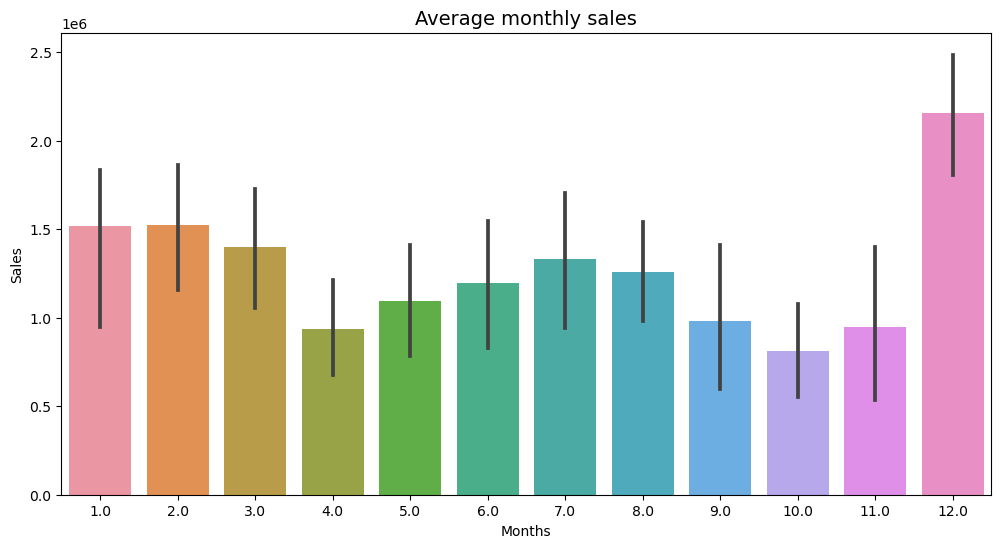

In [16]:
# Average monthly sales
plt.figure(figsize = (12, 6))
monthly_sales_fig = sns.barplot(x = data['Date'].dt.month, y = "Weekly_Sales", data = data)
plt.ylabel("Sales")
plt.xlabel("Months")
plt.title("Average monthly sales", fontsize = 14)
plt.show()

From the distribution observed above, it can be seen that sales are comparable throughout the year, although slightly fluctuating.  
An exception is however present during the month of December during which the sales are much more numerous.

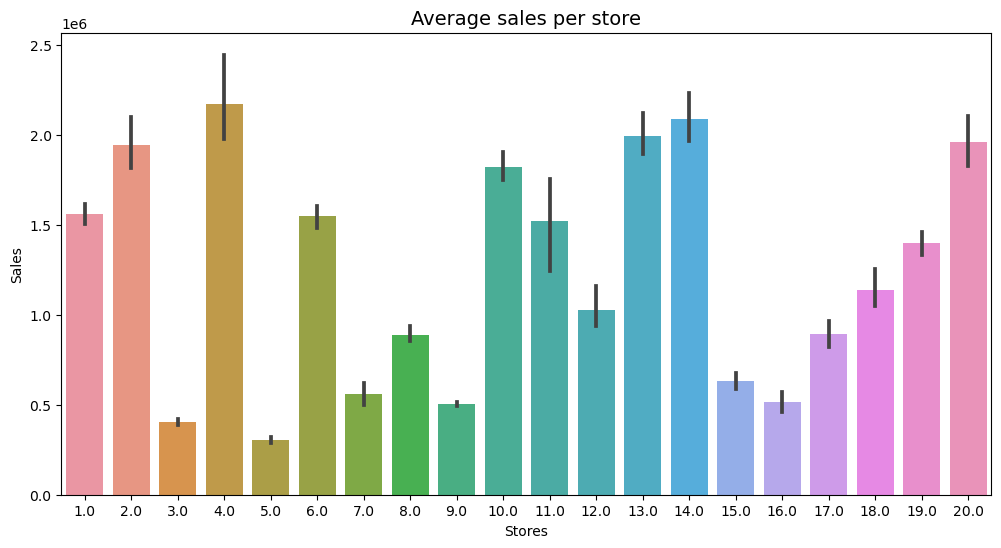

In [18]:
# Average sales per store
plt.figure(figsize = (12, 6))
sales_per_store_fig = sns.barplot(x = "Store", y = "Weekly_Sales", data = data)
plt.ylabel("Sales")
plt.xlabel("Stores")
plt.title("Average sales per store", fontsize = 14)
plt.show()

From this distribution, it is very clear that some stores have much more sales than others.  
In another context, it would be interesting to seek to understand where this difference comes from (geographical situation, population density, etc.).

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\3718412791.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




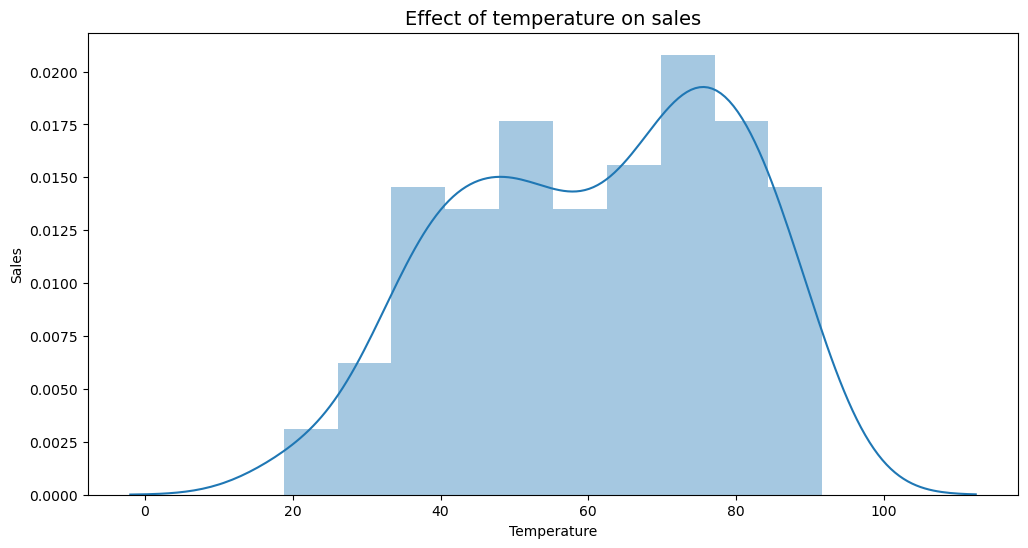

In [23]:
# Effect of temperatures on sales

plt.figure(figsize = (12, 6))
temperatures_fig = sns.distplot(data["Temperature"], bins = 10)
plt.ylabel("Sales")
plt.xlabel("Temperature")
plt.title("Effect of temperature on sales", fontsize = 14)
plt.show()

It seems from this curve that if temperatures are too extreme (too cold or too hot), sales tend to decrease.

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\2593730253.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




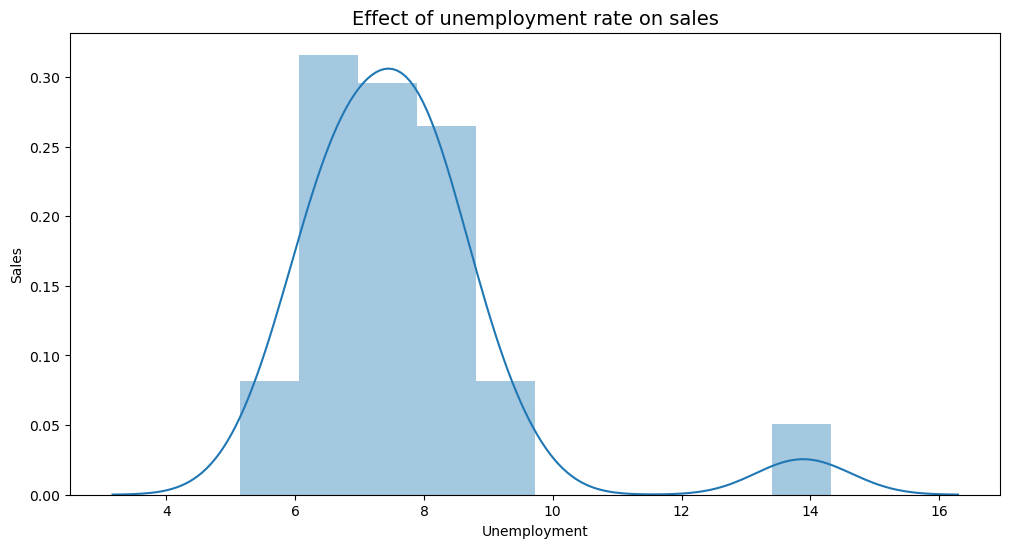

In [44]:
# Effect of temperatures on sales

plt.figure(figsize = (12, 6))
temperatures_fig = sns.distplot(data["Unemployment"], bins = 10)
plt.ylabel("Sales")
plt.xlabel("Unemployment")
plt.title("Effect of unemployment rate on sales", fontsize = 14)
plt.show()

As you might expect, sales are better when the unemployment rate is not too high.

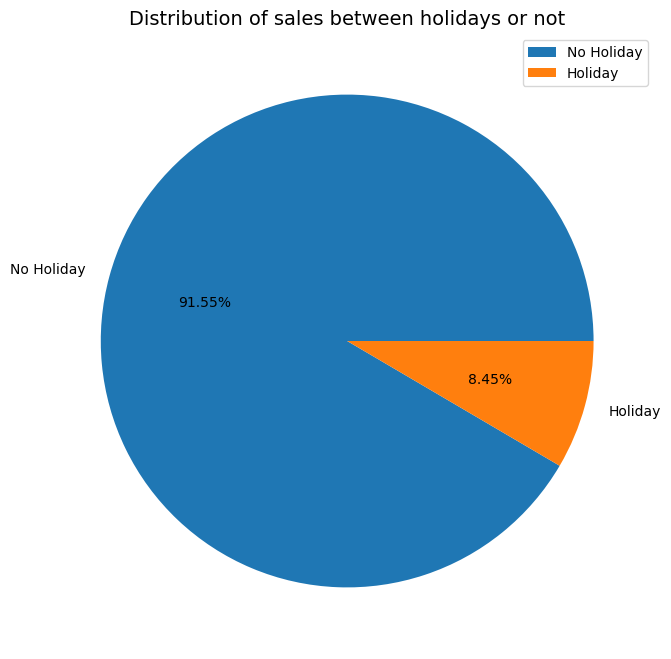

In [76]:
# Holiday Distribution

plt.figure(figsize = (8,8))
plt.pie(data['Holiday_Flag'].value_counts(),labels = ['No Holiday','Holiday'], autopct = '%0.2f%%')
plt.title("Distribution of sales between holidays or not", fontsize = 14)
plt.legend()
plt.show() 

Finally, we note that the majority of sales are made outside holiday periods.  
However, this information must be weighted, holidays being few in number over the year compared to the other days.

### 1.2 Preprocessings

#### 1.2.1 With Pandas

**Drop lines where target values are missing :**

- Here, the target variable (Y) corresponds to the column Weekly_Sales. One can see above that there are some missing values in this column.
- We never use imputation techniques on the target : it might create some bias in the predictions !
- Then, we will just drop the lines in the dataset for which the value in Weekly_Sales is missing.

In [62]:
data = data.dropna(subset = ["Weekly_Sales"])
data.isna().sum()

Store            0
Date            18
Weekly_Sales     0
Holiday_Flag    11
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
dtype: int64

**Create usable features from the Date column :** 

The Date column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features :
- year
- month
- day
- day of week

In [66]:
data = data.dropna(subset = ["Date"])
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year
data["Weekday"] = data["Date"].dt.weekday
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Weekday
67,3.0,2010-02-05,461622.22,0.0,45.71,2.572,214.424881,7.368,5,2,2010,4
44,1.0,2010-02-12,1641957.44,1.0,38.51,2.548,211.242170,8.106,12,2,2010,4
107,8.0,2010-02-12,994801.40,1.0,33.34,2.548,214.621419,6.299,12,2,2010,4
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN,19,2,2010,4
112,2.0,2010-02-19,2124451.54,0.0,39.69,2.514,210.945160,NaN,19,2,2010,4


In [67]:
# Weekday seems identical, let's verify this information
data = data.sort_values(by = "Date", ascending = True)
print(f"Nombre de valeurs différentes dans la colonne Weekday: {data['Weekday'].nunique()}")
# Let's drop this column
data = data.drop(["Weekday", "Date"], axis = 1)
data.head()

Nombre de valeurs différentes dans la colonne Weekday: 1


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
67,3.0,461622.22,0.0,45.71,2.572,214.424881,7.368,5,2,2010
44,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,12,2,2010
107,8.0,994801.40,1.0,33.34,2.548,214.621419,6.299,12,2,2010
115,15.0,660838.75,0.0,NaN,2.909,131.637000,NaN,19,2,2010
112,2.0,2124451.54,0.0,39.69,2.514,210.945160,NaN,19,2,2010


**Drop lines containing invalid values or outliers :** 
In this project, will be considered as outliers all the numeric features that don't fall within the range : [Xˉ−3σ,Xˉ+3σ][Xˉ−3σ,Xˉ+3σ]. This concerns the columns : Temperature, Fuel_price, CPI and Unemployment

In [68]:
# First, convert the temperature from F to C
data["Temperature"] = 5/9 * (data["Temperature"] - 32)

In [69]:
# Define extreme values for each feature 
col = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
extremes = pd.DataFrame()
extremes["Features"] = col
for line, feature  in enumerate(col):
    X = data[feature].mean()
    sigma = data[feature].std()
    extremes.loc[line, "min"] = X - 3 * sigma
    extremes.loc[line, "max"] = X + 3 * sigma
print(extremes)

       Features        min         max
0   Temperature -13.985244   45.887009
1    Fuel_Price   1.831189    4.751895
2           CPI  58.268038  297.167979
3  Unemployment   2.646835   12.715763


In [70]:
# Remove invalid values or outliers
for line, feature in enumerate(col):
    data = data[(data[feature] >= extremes.loc[line, "min"]) & (data[feature] <= extremes.loc[line, "max"])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 67 to 144
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         80 non-null     float64
 1   Weekly_Sales  80 non-null     float64
 2   Holiday_Flag  71 non-null     float64
 3   Temperature   80 non-null     float64
 4   Fuel_Price    80 non-null     float64
 5   CPI           80 non-null     float64
 6   Unemployment  80 non-null     float64
 7   Day           80 non-null     int64  
 8   Month         80 non-null     int64  
 9   Year          80 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 6.9 KB


After removing invalid values and outliers, there is only 80 entries in our dataframe.

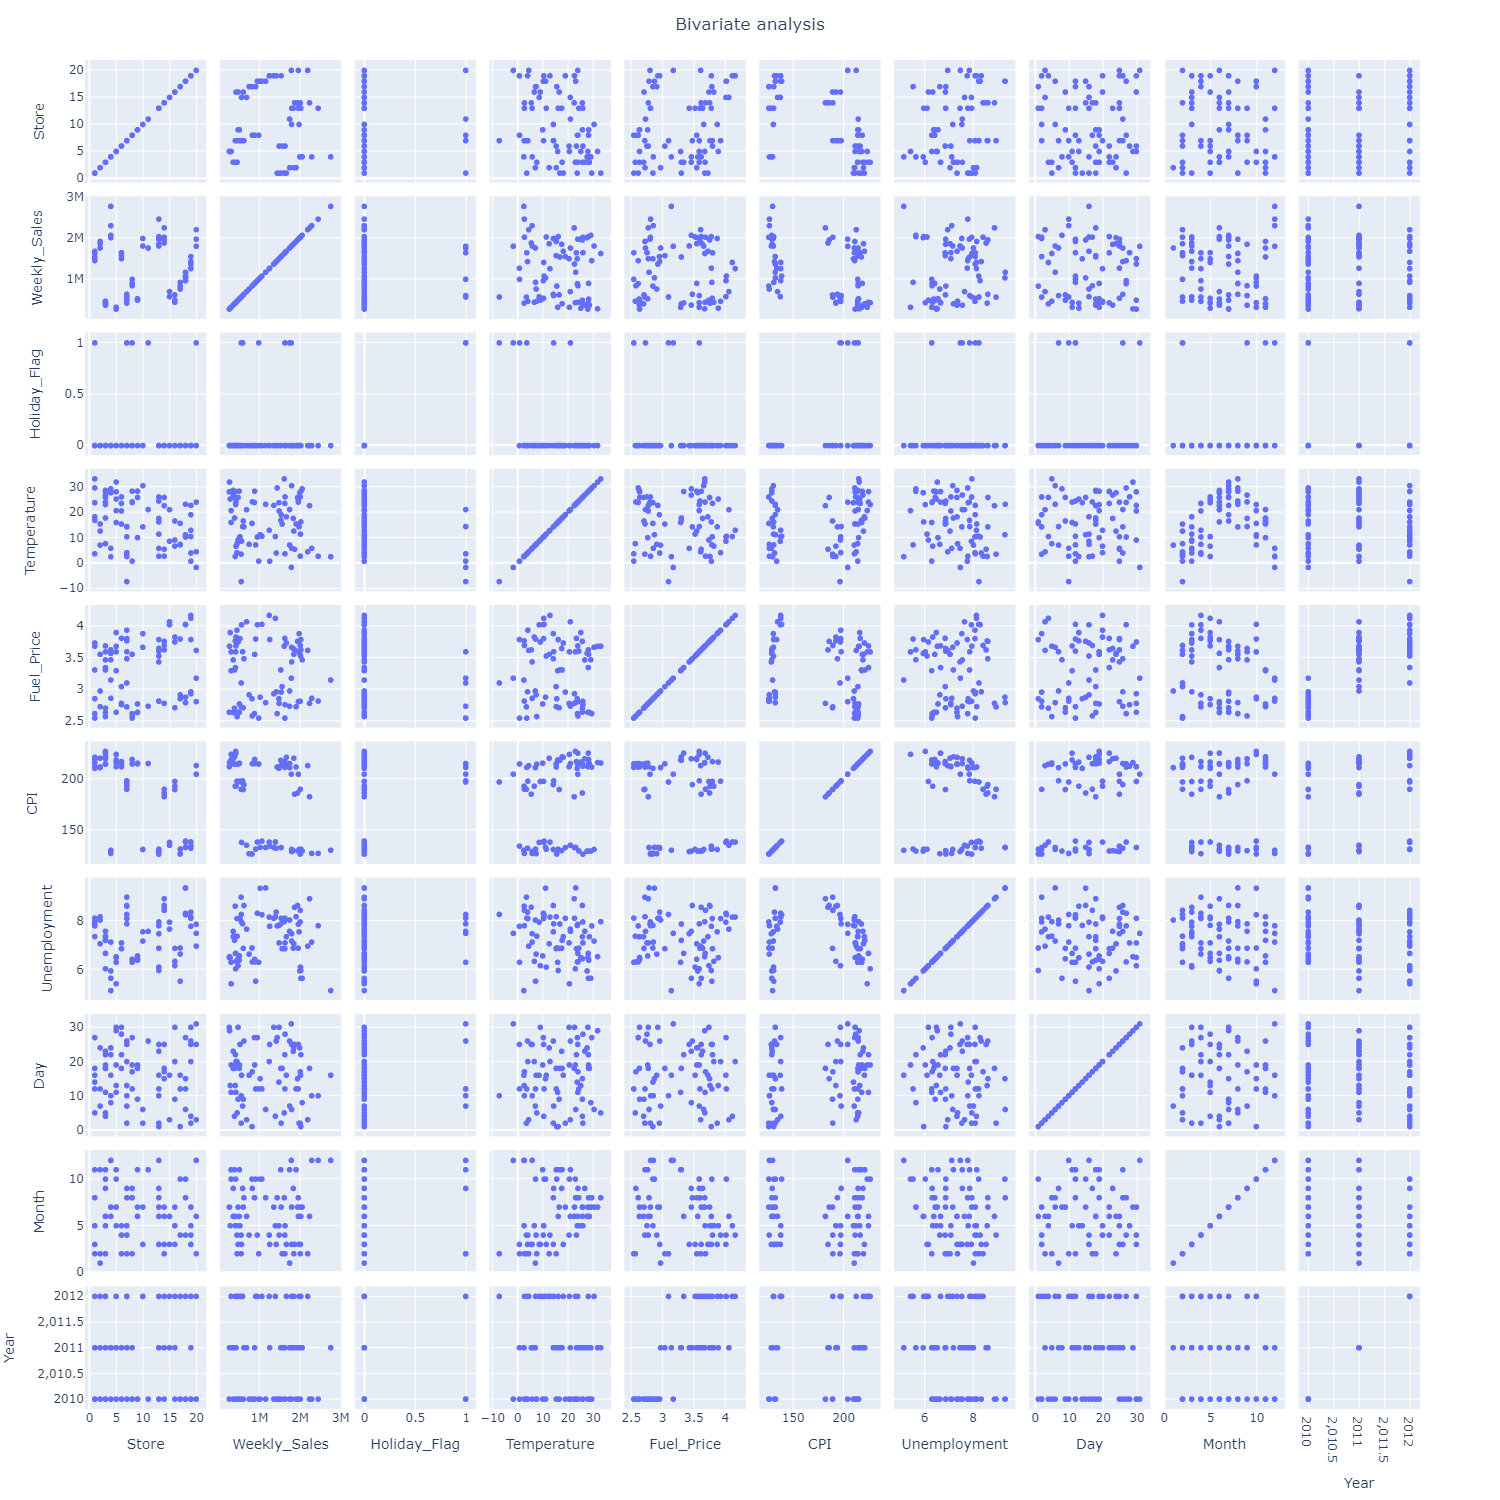

In [71]:
# Visualize pairwise dependencies after taking out outliers
dependencies_fig = px.scatter_matrix(data)
dependencies_fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize = False, height = 1500, width = 1500)
dependencies_fig.show()

Based on these graphs, we do not notice any direct correlation between two variables, they all seem independent and can therefore be used for the following steps.

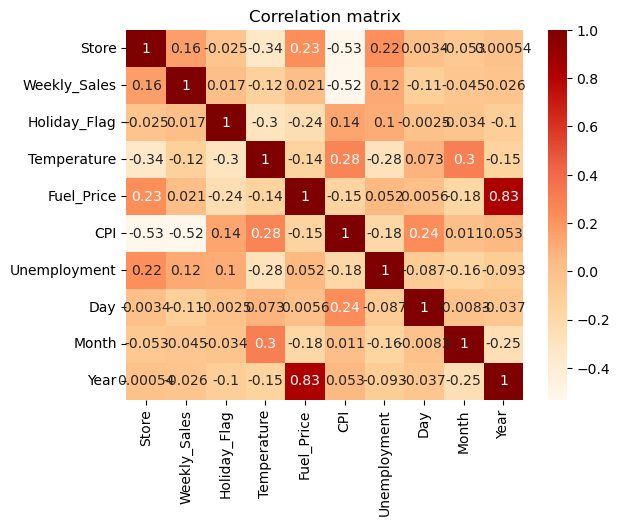

In [72]:
corr_ = data.corr(method = 'spearman')

sns.heatmap(corr_ , annot = True , cmap = 'OrRd')
plt.title('Correlation matrix')
plt.show()

According to this graph, the variables that seem most related to the "Weekly_sales" target are the CPI and Store variables.  
Then there is the temperature and unemployment.

**Target variable/target (Y) that we will try to predict, to separate from the others :** *Weekly_Sales*

In [73]:
# Separate target variable Y from features X
print("Separating labels from features...")

target_variable = "Weekly_Sales"

X = data.drop(target_variable, axis = 1)
Y = data.loc[:,target_variable]

print("...Done.")

Separating labels from features...
...Done.


1.2.2 With scikit-learn

**Explanatory variables (X)** We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.
- Categorical variables : Store, Holiday_Flag
- Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

In [81]:
# Divide dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [82]:
# Create preprocessing pipeline for numerical features
numerical_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Year", "Month", "Day"]
numerical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

# Create preprocessing pipeline for categorical features
categorical_features = ["Store", "Holiday_Flag"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(drop = "first"))
])

# Use the ColumnTransformer to make a preprocessor object that contains all the traetments to be done
preprocessor = ColumnTransformer(transformers = [
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

In [83]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test)

## Part 2 : Baseline model (linear regression)

We are now going to train our first model and assess its performance on train and test set.

In [87]:
# Initialize and train model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [189]:
# Predictions on train and test set
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

# R^2 scores
print(f"R2 score on training set : {r2_score(Y_train, Y_train_pred)}")
print(f"R2 score on test set : {r2_score(Y_test, Y_test_pred)}\n")

# Perform 10-fold cross-validation to evaluate the generalized R2 score obtained with a linear model
scores = cross_val_score(regressor, X_train, Y_train, cv = 10)
print(f"The cross-validated R2 score is : {scores.mean()}")
print(f"The standard deviation associated is : {scores.std()}")

R2 score on training set : 0.9848208420459451
R2 score on test set : 0.9533393090234772

The cross-validated R2 score is : 0.948601478895583
The standard deviation associated is : 0.03375351512027385


Based on these results, we can consider that our model performs as well on the training data as on the test data.  
However, based on this results, it seems that our model is overfitting.

In [151]:
# Get features names from preprocessing pipeline

column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num': 
        features = features_list 
    else: 
        features = pipeline.named_steps['encoder'].get_feature_names_out(categorical_features)
    column_names.extend(features)
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [152]:
# Create a pandas DataFrame with the coefficients of the model
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns = ["Linear Regression"])

# Compute abs() and sort values to deduce feature importance
feature_importance = abs(coefs).sort_values(by = 'Linear Regression', ascending = False)
feature_importance.head()

,Linear Regression
Store_4.0,1.687309e+06
Store_13.0,1.462748e+06
Store_10.0,1.433702e+06
Store_5.0,1.373471e+06
Store_3.0,1.298264e+06


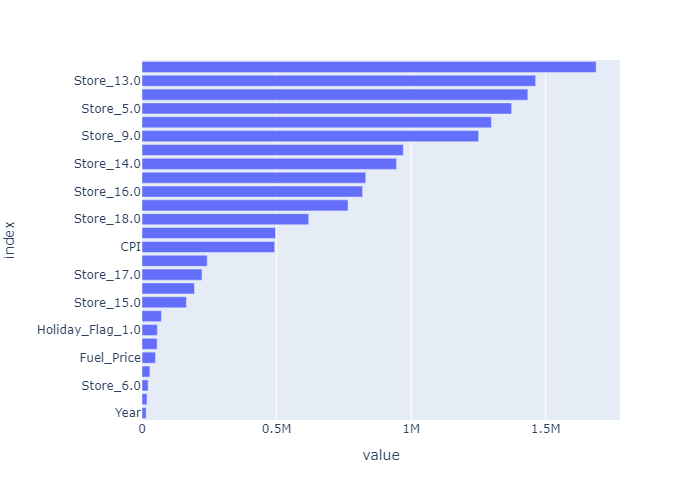

In [153]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  yaxis = {'categoryorder':'total ascending'}
                 )
fig.show()


From this histogram and the preceding table, it is clear that, for this model, the weekly sales depend greatly on the store itself.

In [193]:
# Let's store our scores
df_scores = pd.DataFrame(columns = ["R2 on train set", "R2 on test set"])
df_scores = df_scores.append(pd.DataFrame({"R2 on train set": r2_score(Y_train, Y_train_pred), "R2 on test set": r2_score(Y_test, Y_test_pred)}, index = ["Linear Regression"], columns = df_scores.columns))
display(df_scores)

# Perform 10-fold cross-validation to evaluate the generalized R2 score obtained with a linear model
df_cv_scores = pd.DataFrame(columns = ["CV score", "CV std"])
df_cv_scores = df_cv_scores.append(pd.DataFrame({"CV score": scores.mean(), "CV std": scores.std()}, index = ["Linear Regression"], columns = df_cv_scores.columns))
display(df_cv_scores)

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\3662190444.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,R2 on train set,R2 on test set
Linear Regression,0.984821,0.953339


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\3662190444.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,CV score,CV std
Linear Regression,0.949618,0.033776


## Part 3 : Fight overfitting

As observe with the R2 score previously, our model is subject to overfitting, the aime of this part is to fight it.

### 3.1 Ridge regularization

In [155]:
# Regularization with Ridge with GridSearch to optimize the regularization
regressor_Ridge = Ridge()
params = {
    "alpha": [0.0, 0.01, 0.02, 0.1, 0.5, 1, 5]
}
gridsearch_Ridge = GridSearchCV(regressor_Ridge, param_grid = params, cv = 10)
gridsearch_Ridge.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch_Ridge.best_params_)
print("Best R2 score : ", gridsearch_Ridge.best_score_)

Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9502997717034234


In [194]:
# Let's see the R2 scores
print("R2 score with Ridge regularization on training set : ", gridsearch_Ridge.score(X_train, Y_train))
print("R2 score with Ridge regularization on test set : ", gridsearch_Ridge.score(X_test, Y_test))

# Save new R2 scores 
df_scores = df_scores.append(pd.DataFrame({"R2 on train set": gridsearch_Ridge.score(X_train, Y_train), "R2 on test set": gridsearch_Ridge.score(X_test, Y_test)}, index = ["Ridge regularization"], columns = df_scores.columns))
display(df_scores)

# Perform 10-fold cross-validation to evaluate the generalized R2 score obtained with a linear model
scores = cross_val_score(gridsearch_Ridge, X_train, Y_train, cv = 10)
print(f"The cross-validated R2 score is : {scores.mean()}")
print(f"The standard deviation associated is : {scores.std()}")

# Save new CV R2 scores
df_cv_scores = df_cv_scores.append(pd.DataFrame({"CV score": scores.mean(), "CV std": scores.std()}, index = ["Ridge regularization"], columns = df_cv_scores.columns))
display(df_cv_scores)

R2 score with Ridge regularization on training set :  0.9845881925839653
R2 score with Ridge regularization on test set :  0.9487828479695615


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\2559573560.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,R2 on train set,R2 on test set
Linear Regression,0.984821,0.953339
Ridge regularization,0.984588,0.948783


The cross-validated R2 score is : 0.9496183438465448
The standard deviation associated is : 0.033775838890509384


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\2559573560.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,CV score,CV std
Linear Regression,0.949618,0.033776
Ridge regularization,0.949618,0.033776


In [172]:
# Create a pandas DataFrame with the coefficients of the model
coefs = pd.DataFrame(index = column_names, data = gridsearch_Ridge.best_estimator_.coef_.transpose(), columns = ["Rigde regularization"])

# Compute abs() and sort values to deduce feature importance
feature_importance = abs(coefs).sort_values(by = 'Rigde regularization', ascending = False)
feature_importance.head()

,Rigde regularization
Store_5.0,1.332782e+06
Store_3.0,1.240665e+06
Store_9.0,1.182138e+06
Store_16.0,1.017059e+06
Store_7.0,9.976769e+05


### 3.2 Lasso regularization

In [169]:
# Regularization with Lasso with GridSearch to optimize the regularization
regressor_Lasso = Lasso()
params = {
    "alpha": [0.1, 0.5, 1, 5, 10],
    "max_iter": [100000]
}
gridsearch_Lasso = GridSearchCV(regressor_Lasso, param_grid = params, cv = 10)
gridsearch_Lasso.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch_Lasso.best_params_)
print("Best R2 score : ", gridsearch_Lasso.best_score_)

Best hyperparameters :  {'alpha': 10, 'max_iter': 100000}
Best R2 score :  0.9497083809147273


In [195]:
# Let's see the R2 scores
print("R2 score with Lasso regularization on training set : ", gridsearch_Lasso.score(X_train, Y_train))
print("R2 score with Lasso regularization on test set : ", gridsearch_Lasso.score(X_test, Y_test))

# Save new R2 scores 
df_scores = df_scores.append(pd.DataFrame({"R2 on train set": gridsearch_Lasso.score(X_train, Y_train), "R2 on test set": gridsearch_Lasso.score(X_test, Y_test)}, index = ["Lasso regularization"], columns = df_scores.columns))
display(df_scores)

# Perform 10-fold cross-validation to evaluate the generalized R2 score obtained with a linear model
scores = cross_val_score(gridsearch_Lasso, X_train, Y_train, cv = 10)
print(f"The cross-validated R2 score is : {scores.mean()}")
print(f"The standard deviation associated is : {scores.std()}")

# Save new CV R2 scores
df_cv_scores = df_cv_scores.append(pd.DataFrame({"CV score": scores.mean(), "CV std": scores.std()}, index = ["Lasso regularization"], columns = df_cv_scores.columns))
display(df_cv_scores)

R2 score with Lasso regularization on training set :  0.9847973844452391
R2 score with Lasso regularization on test set :  0.9519866977308171


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\2002517916.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,R2 on train set,R2 on test set
Linear Regression,0.984821,0.953339
Ridge regularization,0.984588,0.948783
Lasso regularization,0.984797,0.951987


The cross-validated R2 score is : 0.9497708986129508
The standard deviation associated is : 0.034965454873406125


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_19024\2002517916.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,CV score,CV std
Linear Regression,0.949618,0.033776
Ridge regularization,0.949618,0.033776
Lasso regularization,0.949771,0.034965


In [173]:
# Create a pandas DataFrame with the coefficients of the model
coefs = pd.DataFrame(index = column_names, data = gridsearch_Lasso.best_estimator_.coef_.transpose(), columns = ["Lasso regularization"])

# Compute abs() and sort values to deduce feature importance
feature_importance = abs(coefs).sort_values(by = 'Lasso regularization', ascending = False)
feature_importance.head()

,Lasso regularization
Store_4.0,1.372580e+06
Store_5.0,1.369171e+06
Store_3.0,1.283868e+06
Store_9.0,1.238331e+06
Store_13.0,1.148905e+06


## Conclusions

Let's start by comparing the results obtained using the different models in order to evaluate their performance.

In [196]:
print("R2 scores obtained with the different models :")
display(df_scores)

print("Cross-validation R2 scores obtained with the different models :")
display(df_cv_scores)

R2 scores obtained with the different models :


,R2 on train set,R2 on test set
Linear Regression,0.984821,0.953339
Ridge regularization,0.984588,0.948783
Lasso regularization,0.984797,0.951987


Cross-validation R2 scores obtained with the different models :


,CV score,CV std
Linear Regression,0.949618,0.033776
Ridge regularization,0.949618,0.033776
Lasso regularization,0.949771,0.034965


According to the different results obtained, although the Ridge and Lasso regularizations seem to slightly reduce the overfitting, the results are not significantly different, regularization was thus not necessary for this specific problem.  
Moreover, regarding the importance of the variables, the store seems to be the most important criterion for sales. There is also the CPI (Consumer Price Index) which seems to be important.  
  
However, it is important to note that, the original dataset is only composed of 150 entries, and following data cleaning, only 80 are kept. This dataset is therefore small for modeling, so it would be good to repeat this experiment with a larger dataset.  